# K-Means Clustering

Ultimate goal of this exercise is to implement K-means clustering and use it to compress an image.  

Firstly, we'll start with a simple 2D data set to implement initializing centroids, finding closest centroids and computing centroid means. Then we'll apply it to image compression prob


# 1. K-means clustering on a 2-D dataset

To start out we're going to implement and apply K-means to a simple 2-dimensional data set to gain some intuition about how it works.  K-means is an iterative, unsupervised clustering algorithm that groups similar instances together into clusters.  

The algorithm will:
* randomly initialize the initial centroids for each cluster
* repeatedly assign datapoints to the nearest cluster 
* re-compute the centroids of each cluster

In [1]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import math

In [3]:
def ecludian_distance(point1,point2):
    '''Return distance between 2 point'''
    sum=0
    for x,y in zip(point1,point2):
        sum+=math.pow((x-y),2)
    return math.sqrt(sum)

## Cluster assignment algorithm

In [4]:
# Assign every training example x^(i) to its closest centroid, given the current centroid positions
def find_closest_centroids(X, centroids):
    '''returns the array of assigned clusters to each example '''
    label_array = np.zeros(np.shape(X)[0])
    
    for point in range(np.shape(X)[0]):
        #create a distance array
        distance_array = np.zeros(np.shape(centroids)[0])
        #find distance of current point fro all centroid
        for centroid in range(np.shape(centroids)[0]):
            distance_array[centroid] = ecludian_distance(X[point,],centroids[centroid,])
        min_index =np.argmin(distance_array)
        label_array[point] = min_index+1
    return label_array

In [5]:
def Normalized_data(x):
    m = np.mean(x)
    sd = np.std(x)
    return (x-m)/sd

In [6]:
data=pd.read_csv('./iris.data', header=None)
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print data.describe()
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
X = Normalized_data(X)

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


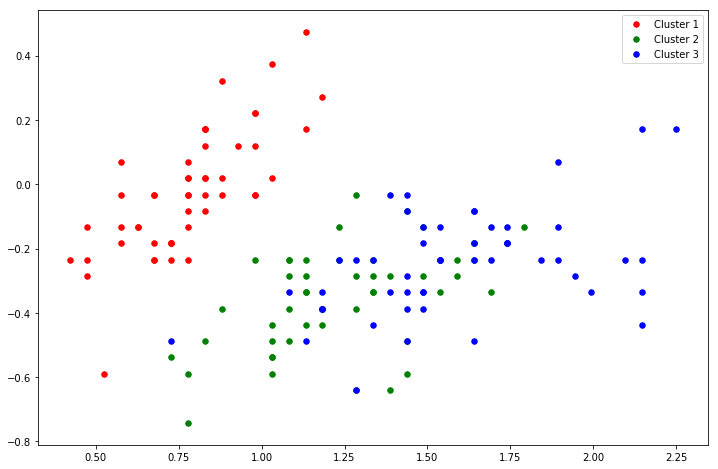

In [7]:
cluster1 = X[0:50,:]
cluster2 = X[50:100,:]
cluster3 = X[100:150,:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()

Now we will shuffle our data so that the data point are not in order.

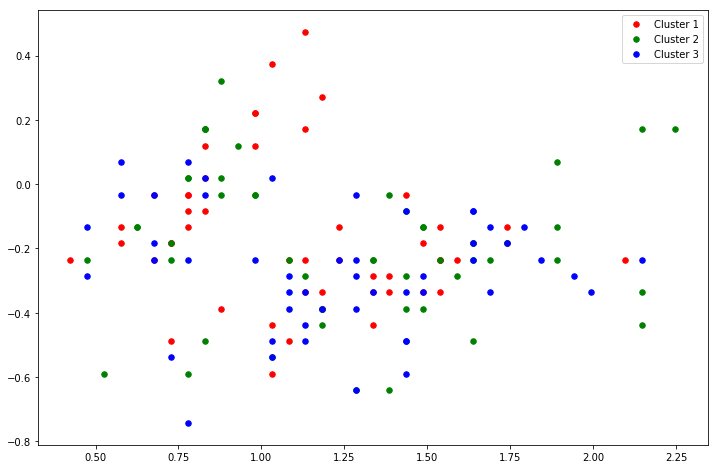

In [8]:
np.random.shuffle(X)
cluster1 = X[0:50,:]
cluster2 = X[50:100,:]
cluster3 = X[100:150,:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()


Now, test the function to make sure it's working as expected.  We'll use the test case provided in the exercise.

In [9]:
initial_centroids = initial_centroids = np.array([X[random.randint(0,50)], X[random.randint(50,100)], X[random.randint(100,150)]])
print np.shape(initial_centroids)[0]
idx = find_closest_centroids(X, initial_centroids)

3


## Computing centoroid means

Next we need a function to compute the centroid of a cluster.  The centroid is simply the mean of all of the examples currently assigned to the cluster.

In [10]:
# Update Centroids
def compute_centroids(X, idx, k):
    new_centroid = np.zeros((k,np.shape(X)[1]))
    
    for i in range(1,k+1):
        new_centroid[i-1] = np.mean(X[idx==i],axis=0)
    return new_centroid

In [11]:
compute_centroids(X, idx, 3)

array([[ 1.48809253, -0.27140802,  0.78064019, -0.89521487],
       [ 0.78120658, -0.04199463, -0.98015175, -1.61533185],
       [ 1.01891202, -0.4670717 ,  0.52076975, -0.92722007]])

This output also matches the expected values from the exercise.

## Putting it all together (full algorithm: cluster assignment and re-computing centroids)


Let's run the full algorithm. We will alternate between assigning examples to the nearest cluster and re-computing the cluster centroids for some number of iterations.

In [12]:
def run_k_means(X, initial_centroids, max_iters):
    '''returns final indexes and centroids after running kmeans for max_iters'''
    idx = find_closest_centroids(X, initial_centroids)
    new_centroid = compute_centroids(X,idx,3)
    for i in range(max_iters):
        idx = find_closest_centroids(X,new_centroid)
        new_centroid - compute_centroids(X,idx,3)
    return idx,new_centroid

In [13]:
idx, centroids = run_k_means(X, initial_centroids, 1000)

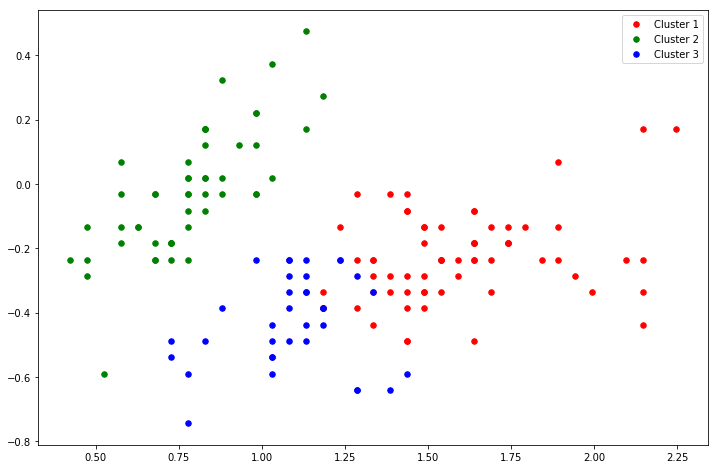

In [14]:
cluster1 = X[np.where(idx == 1)[0],:]
cluster2 = X[np.where(idx == 2)[0],:]
cluster3 = X[np.where(idx == 3)[0],:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()